Authors : Vincent Henric & Antoine Lepeltier

All the results are reproducible by launching this notebook. It will call all the relevant functions in various python files

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import utils
import LDA
import logistic_regression as log_r
import linear_regression as lin_r
import QDA

# Import data

In [2]:
X_train_A, y_train_A = utils.import_data('trainA')
X_train_B, y_train_B = utils.import_data('trainB')
X_train_C, y_train_C = utils.import_data('trainC')

X_test_A, y_test_A = utils.import_data('testA')
X_test_B, y_test_B = utils.import_data('testB')
X_test_C, y_test_C = utils.import_data('testC')

# LDA

## Dataset A

In [3]:
X, y = X_train_A, y_train_A
X_test, y_test = X_test_A, y_test_A
n = X.shape[0]
dataset_letter = 'A'

### Training set

In [4]:
mu0, mu1, sigma, pi = LDA.mle(X, y)
w1, w2, b = LDA.linear_coef(mu0, mu1, sigma, pi)
coefs = {'mu0':mu0, 'mu1':mu1, 'sigma':sigma, 'pi':pi, 'w1':w1, 'w2':w2, 'b':b}

for key in coefs.keys():
    print('{} : {}'.format(key, coefs[key]))

mu0 : [10.73248858 10.93983367]
mu1 : [11.03264581  5.99294053]
sigma : [[0.58821974 0.13912842]
 [0.13912842 0.81959919]]
pi : 0.48
w1 : 2.0189447314108504
w2 : -6.378466227102212
b : 31.951219791119815


Misclassification error rate: 0.0 %


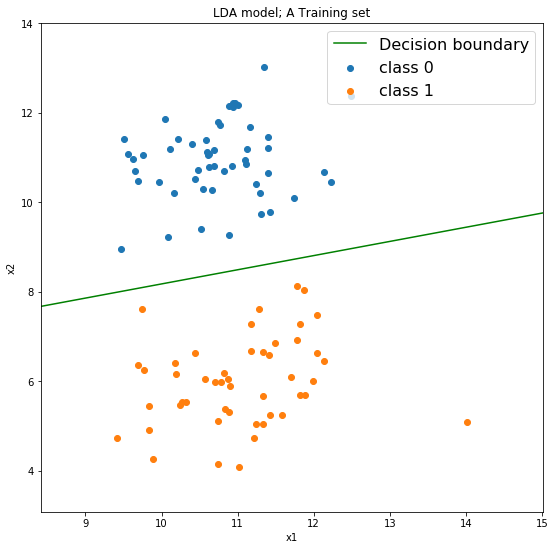

In [5]:
y_pred = np.array([LDA.predict(x, mu0, mu1, sigma, pi) for x in X])
print('Misclassification error rate: {} %'.format(utils.misclassification_rate(y_pred, y)))
LDA.plot_boundary(X, y, coefs, 'LDA model; {} Training set'.format(dataset_letter))

### Test set

Misclassification error rate: 1.0 %


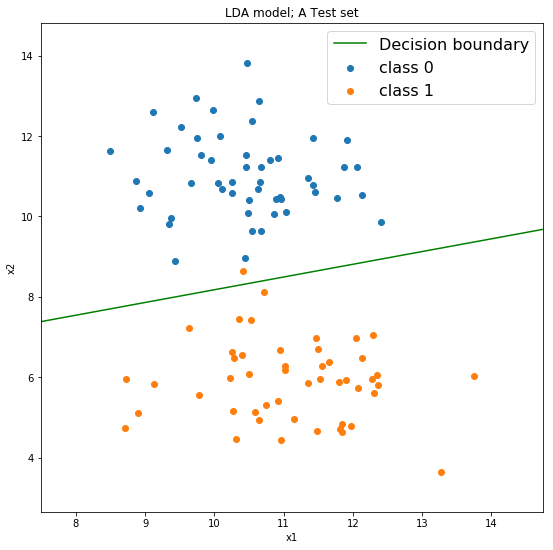

In [6]:
y_pred = np.array([LDA.predict(x, mu0, mu1, sigma, pi) for x in X_test])
print('Misclassification error rate: {} %'.format(utils.misclassification_rate(y_pred, y_test)))
LDA.plot_boundary(X_test, y_test, coefs, 'LDA model; {} Test set'.format(dataset_letter))

## Dataset B

In [7]:
X, y = X_train_B, y_train_B
X_test, y_test = X_test_B, y_test_B
n = X.shape[0]
dataset_letter = 'B'

### Training set

In [8]:
mu0, mu1, sigma, pi = LDA.mle(X, y)
w1, w2, b = LDA.linear_coef(mu0, mu1, sigma, pi)
coefs = {'mu0':mu0, 'mu1':mu1, 'sigma':sigma, 'pi':pi, 'w1':w1, 'w2':w2, 'b':b}

for key in coefs.keys():
    print('{} : {}'.format(key, coefs[key]))

mu0 : [10.58256756 11.17169818]
mu1 : [11.24757662  6.095283  ]
sigma : [[1.64391088 0.70139847]
 [0.70139847 2.0605845 ]]
pi : 0.55
w1 : 1.7029769047924397
w2 : -3.0432533015817658
b : 7.886453738529224


Misclassification error rate: 2.0 %


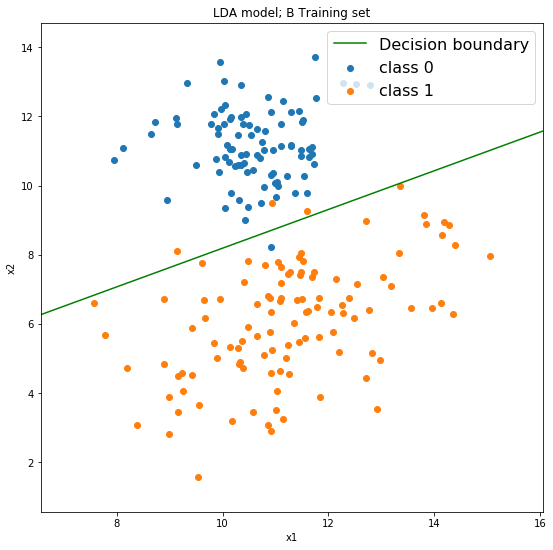

In [9]:
y_pred = np.array([LDA.predict(x, mu0, mu1, sigma, pi) for x in X])
print('Misclassification error rate: {} %'.format(utils.misclassification_rate(y_pred, y)))
LDA.plot_boundary(X, y, coefs, 'LDA model; {} Training set'.format(dataset_letter))

### Test set

Misclassification error rate: 4.5 %


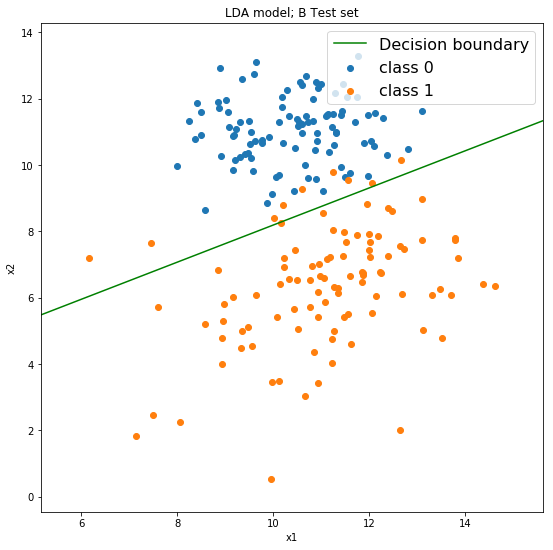

In [10]:
y_pred = np.array([LDA.predict(x, mu0, mu1, sigma, pi) for x in X_test])
print('Misclassification error rate: {} %'.format(utils.misclassification_rate(y_pred, y_test)))
LDA.plot_boundary(X_test, y_test, coefs, 'LDA model; {} Test set'.format(dataset_letter))

## Dataset C

In [11]:
X, y = X_train_C, y_train_C
X_test, y_test = X_test_C, y_test_C
n = X.shape[0]
dataset_letter = 'C'

### Training set

In [12]:
mu0, mu1, sigma, pi = LDA.mle(X, y)
w1, w2, b = LDA.linear_coef(mu0, mu1, sigma, pi)
coefs = {'mu0':mu0, 'mu1':mu1, 'sigma':sigma, 'pi':pi, 'w1':w1, 'w2':w2, 'b':b}

for key in coefs.keys():
    print('{} : {}'.format(key, coefs[key]))

mu0 : [10.6192273  10.83868653]
mu1 : [11.18463199  6.04249315]
sigma : [[ 1.27823018 -0.06243809]
 [-0.06243809  1.66584186]]
pi : 0.4166666666666667
w1 : 0.30224914409616055
w2 : -2.867812137471072
b : 20.574454860925506


Misclassification error rate: 2.67 %


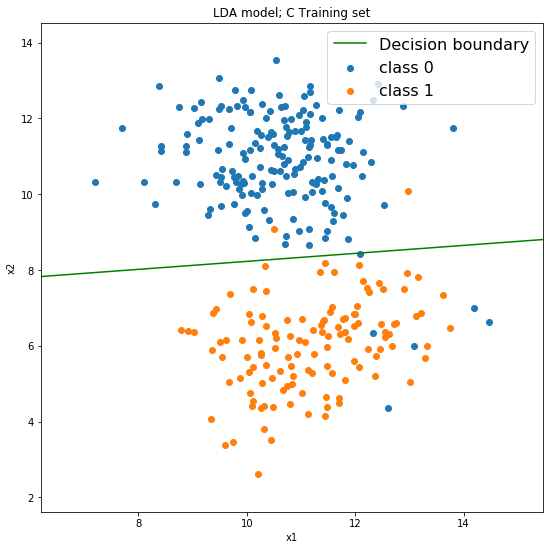

In [13]:
y_pred = np.array([LDA.predict(x, mu0, mu1, sigma, pi) for x in X])
print('Misclassification error rate: {} %'.format(utils.misclassification_rate(y_pred, y)))
LDA.plot_boundary(X, y, coefs, 'LDA model; {} Training set'.format(dataset_letter))

### Test set

Misclassification error rate: 4.0 %


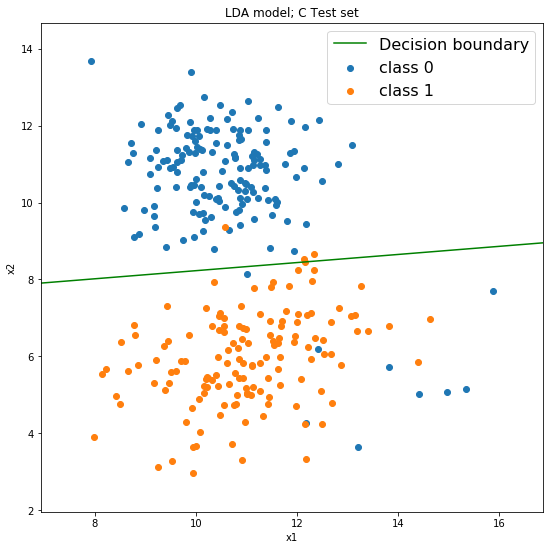

In [14]:
y_pred = np.array([LDA.predict(x, mu0, mu1, sigma, pi) for x in X_test])
print('Misclassification error rate: {} %'.format(utils.misclassification_rate(y_pred, y_test)))
LDA.plot_boundary(X_test, y_test, coefs, 'LDA model; {} Test set'.format(dataset_letter))

# Logistic regression

## Dataset A

In [15]:
X, y = X_train_A, y_train_A
X_test, y_test = X_test_A, y_test_A

# Add intercept
X = utils.add_intercept(X)
X_test = utils.add_intercept(X_test)

n = X.shape[0]
dataset_letter = 'A'

### Training set

In [16]:
w1, w2, b = log_r.learn(X, y)

coefs = {'w1':w1, 'w2':w2, 'b':b}

for key in coefs.keys():
    print('{} : {}'.format(key, coefs[key]))

Number of iterations IRLS :  13
w1 : 3.6681253348501146
w2 : -13.039051914116694
b : 72.27519056790742


Misclassification error rate: 0.0 %


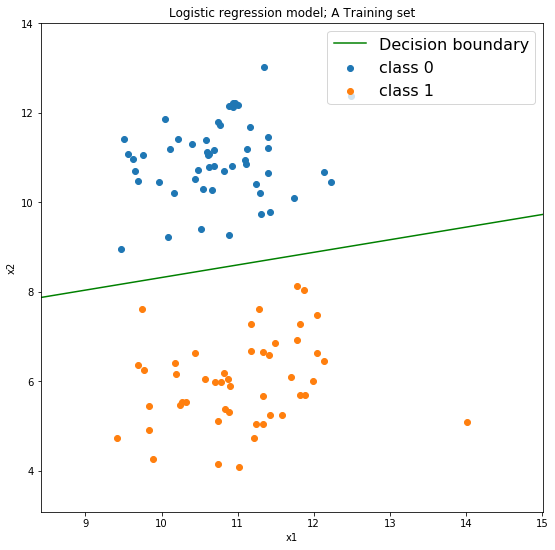

In [17]:
y_pred = log_r.predict(X, w1, w2, b)
print('Misclassification error rate: {} %'.format(utils.misclassification_rate(y_pred, y)))
log_r.plot_boundary(X, y, coefs, 'Logistic regression model; {} Training set'.format(dataset_letter))

### Test set

Misclassification error rate: 1.0 %


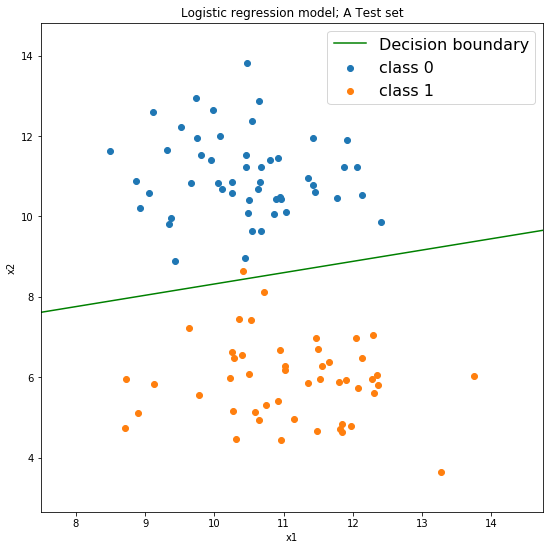

In [18]:
y_pred = log_r.predict(X_test, w1, w2, b)
print('Misclassification error rate: {} %'.format(utils.misclassification_rate(y_pred, y_test)))
log_r.plot_boundary(X_test, y_test, coefs, 'Logistic regression model; {} Test set'.format(dataset_letter))

## Dataset B

In [19]:
X, y = X_train_B, y_train_B
X_test, y_test = X_test_B, y_test_B

# Add intercept
X = utils.add_intercept(X)
X_test = utils.add_intercept(X_test)

n = X.shape[0]
dataset_letter = 'B'

### Training set

In [20]:
w1, w2, b = log_r.learn(X, y)

coefs = {'w1':w1, 'w2':w2, 'b':b}

for key in coefs.keys():
    print('{} : {}'.format(key, coefs[key]))

Number of iterations IRLS :  9
w1 : 1.842386451871688
w2 : -3.713920587158777
b : 13.430098433607228


Misclassification error rate: 1.0 %


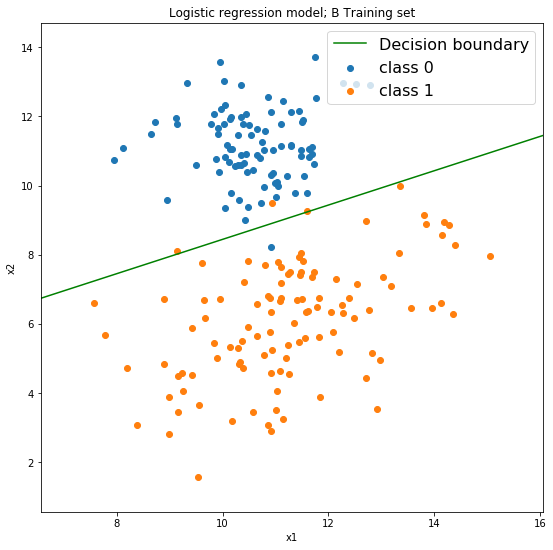

In [21]:
y_pred = log_r.predict(X, w1, w2, b)
print('Misclassification error rate: {} %'.format(utils.misclassification_rate(y_pred, y)))
log_r.plot_boundary(X, y, coefs, 'Logistic regression model; {} Training set'.format(dataset_letter))

### Test set

Misclassification error rate: 3.5 %


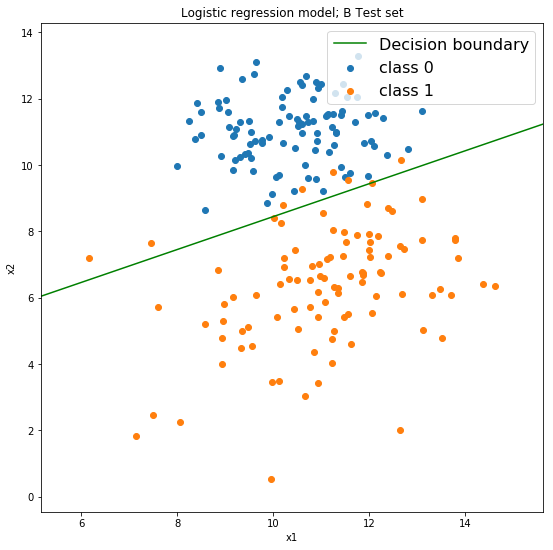

In [22]:
y_pred = log_r.predict(X_test, w1, w2, b)
print('Misclassification error rate: {} %'.format(utils.misclassification_rate(y_pred, y_test)))
log_r.plot_boundary(X_test, y_test, coefs, 'Logistic regression model; {} Test set'.format(dataset_letter))

## Dataset C

In [23]:
X, y = X_train_C, y_train_C
X_test, y_test = X_test_C, y_test_C

# Add intercept
X = utils.add_intercept(X)
X_test = utils.add_intercept(X_test)

n = X.shape[0]
dataset_letter = 'C'

### Training set

In [24]:
w1, w2, b = log_r.learn(X, y)

coefs = {'w1':w1, 'w2':w2, 'b':b}

for key in coefs.keys():
    print('{} : {}'.format(key, coefs[key]))

Number of iterations IRLS :  7
w1 : -0.27693417434306977
w2 : -1.914198004982753
b : 18.80703534412378


Misclassification error rate: 3.0 %


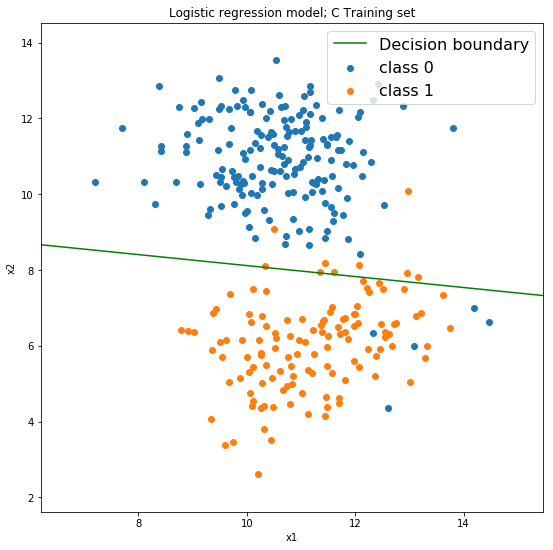

In [25]:
y_pred = log_r.predict(X, w1, w2, b)
print('Misclassification error rate: {} %'.format(utils.misclassification_rate(y_pred, y)))
log_r.plot_boundary(X, y, coefs, 'Logistic regression model; {} Training set'.format(dataset_letter))

### Test set

Misclassification error rate: 4.67 %


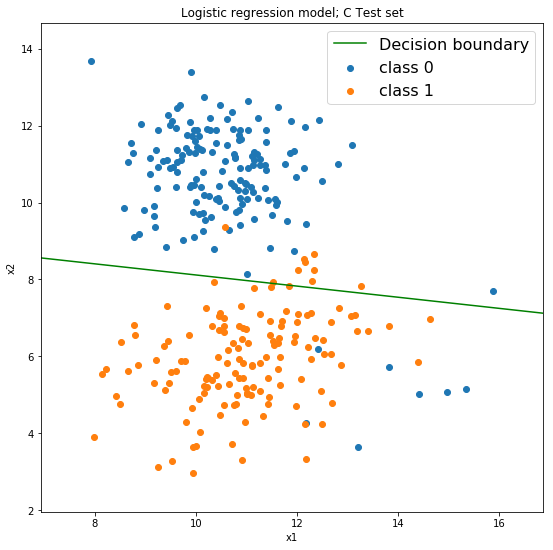

In [26]:
y_pred = log_r.predict(X_test, w1, w2, b)
print('Misclassification error rate: {} %'.format(utils.misclassification_rate(y_pred, y_test)))
log_r.plot_boundary(X_test, y_test, coefs, 'Logistic regression model; {} Test set'.format(dataset_letter))

# Linear regression

### Dataset A

In [27]:
X, y = X_train_A, y_train_A
X_test, y_test = X_test_A, y_test_A

# Add intercept
X = utils.add_intercept(X)
X_test = utils.add_intercept(X_test)

n = X.shape[0]
dataset_letter = 'A'

### Training set

In [28]:
w1, w2, b = lin_r.mle(X, y)

coefs = {'w1':w1, 'w2':w2, 'b':b}

for key in coefs.keys():
    print('{} : {}'.format(key, coefs[key]))

w1 : 0.05582438270270512
w2 : -0.17636636316895093
b : 1.3834577395037184


Misclassification error rate: 0.0 %


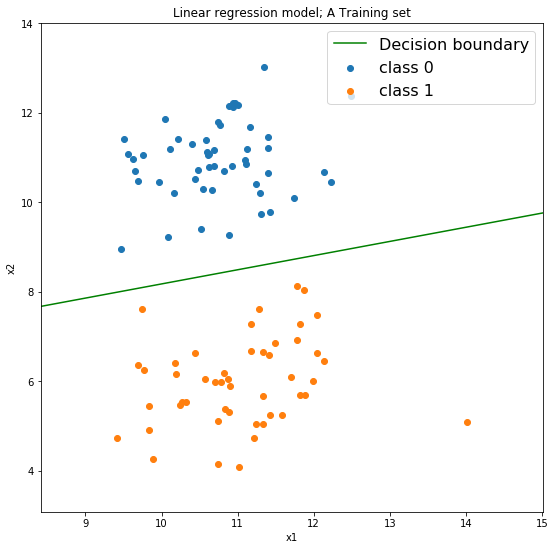

In [29]:
y_pred = lin_r.predict(X, w1, w2, b)
print('Misclassification error rate: {} %'.format(utils.misclassification_rate(y_pred, y)))
lin_r.plot_boundary(X, y, coefs, 'Linear regression model; {} Training set'.format(dataset_letter))

### Test set

Misclassification error rate: 1.0 %


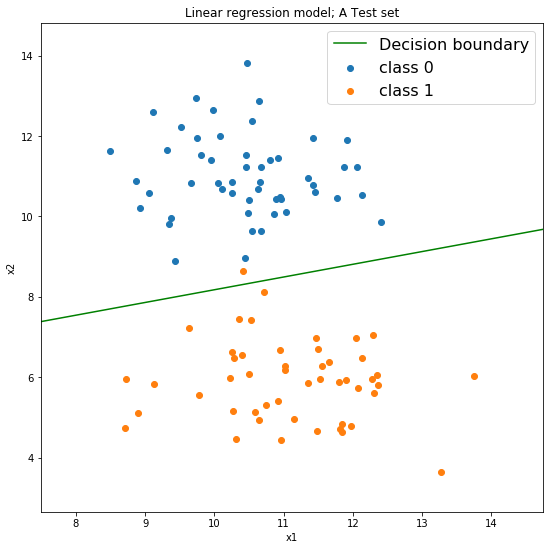

In [30]:
y_pred = lin_r.predict(X_test, w1, w2, b)
print('Misclassification error rate: {} %'.format(utils.misclassification_rate(y_pred, y_test)))
lin_r.plot_boundary(X_test, y_test, coefs, 'Linear regression model; {} Test set'.format(dataset_letter))

### Dataset B

In [31]:
X, y = X_train_B, y_train_B
X_test, y_test = X_test_B, y_test_B

# Add intercept
X = utils.add_intercept(X)
X_test = utils.add_intercept(X_test)

n = X.shape[0]
dataset_letter = 'B'

### Training set

In [32]:
w1, w2, b = lin_r.mle(X, y)

coefs = {'w1':w1, 'w2':w2, 'b':b}

for key in coefs.keys():
    print('{} : {}'.format(key, coefs[key]))

w1 : 0.08258172475672938
w2 : -0.1475751701676084
b : 0.8824998417113521


Misclassification error rate: 2.0 %


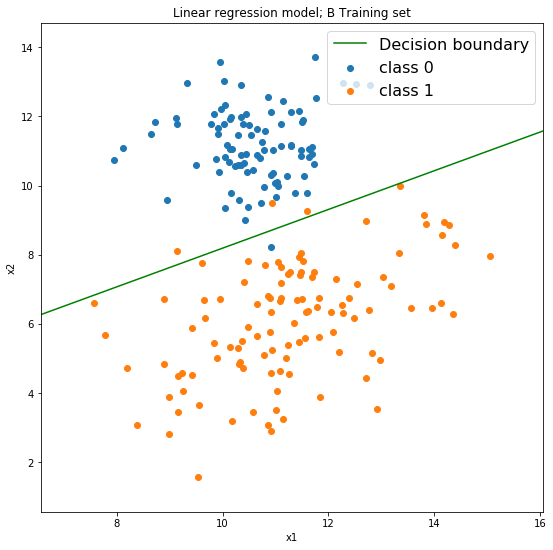

In [33]:
y_pred = lin_r.predict(X, w1, w2, b)
print('Misclassification error rate: {} %'.format(utils.misclassification_rate(y_pred, y)))
lin_r.plot_boundary(X, y, coefs, 'Linear regression model; {} Training set'.format(dataset_letter))

### Test set

Misclassification error rate: 4.5 %


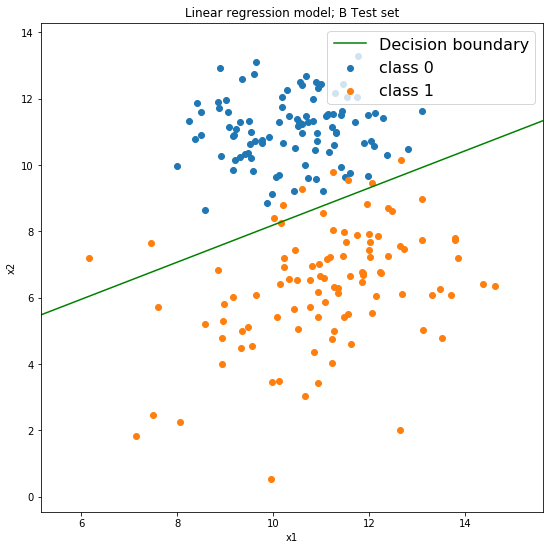

In [34]:
y_pred = lin_r.predict(X_test, w1, w2, b)
print('Misclassification error rate: {} %'.format(utils.misclassification_rate(y_pred, y_test)))
lin_r.plot_boundary(X_test, y_test, coefs, 'Linear regression model; {} Test set'.format(dataset_letter))

### Dataset C

In [35]:
X, y = X_train_C, y_train_C
X_test, y_test = X_test_C, y_test_C

# Add intercept
X = utils.add_intercept(X)
X_test = utils.add_intercept(X_test)

n = X.shape[0]
dataset_letter = 'C'

### Training set

In [36]:
w1, w2, b = lin_r.mle(X, y)

coefs = {'w1':w1, 'w2':w2, 'b':b}

for key in coefs.keys():
    print('{} : {}'.format(key, coefs[key]))

w1 : 0.016754609691428942
w2 : -0.15897174225373256
b : 1.6401520597430002


Misclassification error rate: 2.67 %


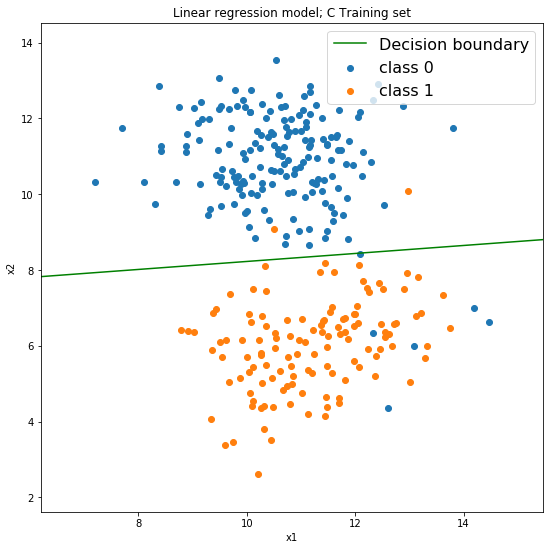

In [37]:
y_pred = lin_r.predict(X, w1, w2, b)
print('Misclassification error rate: {} %'.format(utils.misclassification_rate(y_pred, y)))
lin_r.plot_boundary(X, y, coefs, 'Linear regression model; {} Training set'.format(dataset_letter))

### Test set

Misclassification error rate: 4.0 %


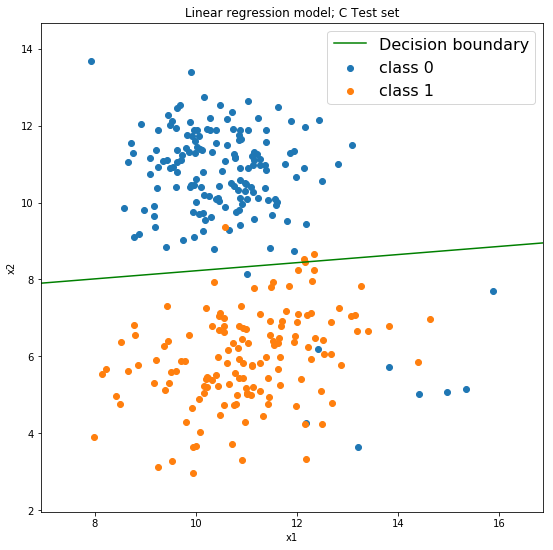

In [38]:
y_pred = lin_r.predict(X_test, w1, w2, b)
print('Misclassification error rate: {} %'.format(utils.misclassification_rate(y_pred, y_test)))
lin_r.plot_boundary(X_test, y_test, coefs, 'Linear regression model; {} Test set'.format(dataset_letter))

# QDA

## Dataset A

In [39]:
X, y = X_train_A, y_train_A
X_test, y_test = X_test_A, y_test_A
n = X.shape[0]
dataset_letter = 'A'

### Training set

In [40]:
mu0, mu1, sigma0, sigma1, pi = QDA.mle(X, y)
a, b, c, d, e, f = QDA.linear_coef(mu0, mu1, sigma0, sigma1, pi)

coefs = {'mu0':mu0, 'mu1':mu1, 'sigma0':sigma0, 'sigma1':sigma1, 'pi':pi,
         'a':a, 'b':b, 'c':c, 'd':d, 'e':e, 'f':f}

for key in coefs.keys():
    print('{} : {}'.format(key, coefs[key]))

mu0 : [10.73248858 10.93983367]
mu1 : [11.03264581  5.99294053]
sigma0 : [[0.46464757 0.0989291 ]
 [0.0989291  0.71324415]]
sigma1 : [[0.7220896  0.18267769]
 [0.18267769 0.93481714]]
pi : 0.48
a : 0.38038267905733436
b : -0.011448203324935319
c : 0.1596731606820987
d : -6.068746632468658
e : -8.900363486035463
f : 87.58145919499313


Misclassification error rate: 0.0 %


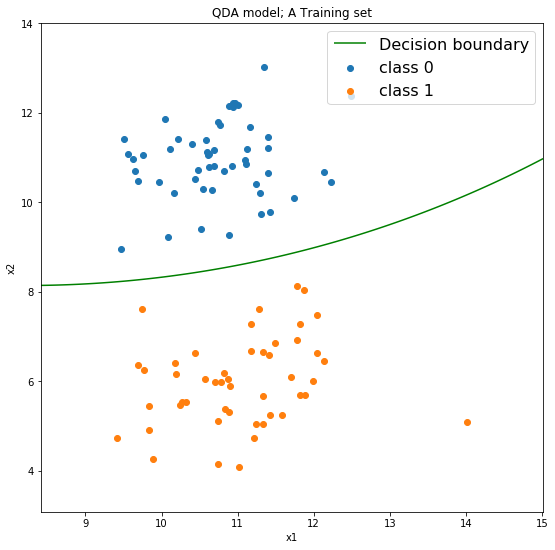

In [41]:
y_pred = np.array([QDA.predict(x, mu0, mu1, sigma0, sigma1, pi) for x in X])
print('Misclassification error rate: {} %'.format(utils.misclassification_rate(y_pred, y)))
QDA.plot_boundary(X, y, coefs, 'QDA model; {} Training set'.format(dataset_letter))

### Test set

Misclassification error rate: 1.0 %


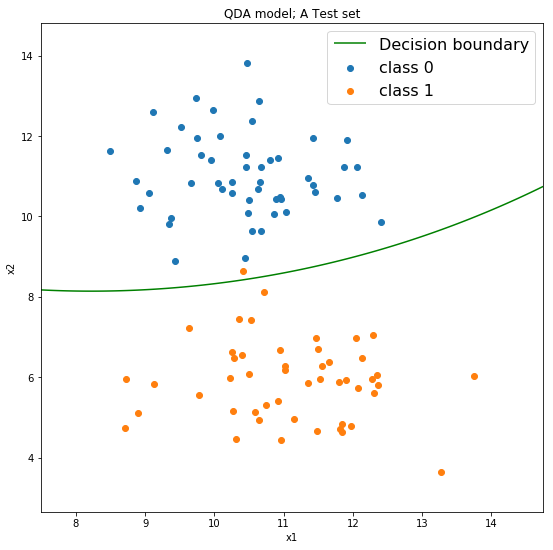

In [42]:
y_pred = np.array([QDA.predict(x, mu0, mu1, sigma0, sigma1, pi) for x in X_test])
print('Misclassification error rate: {} %'.format(utils.misclassification_rate(y_pred, y_test)))
QDA.plot_boundary(X_test, y_test, coefs, 'QDA model; {} Test set'.format(dataset_letter))

## Dataset B

In [43]:
X, y = X_train_B, y_train_B
X_test, y_test = X_test_B, y_test_B
n = X.shape[0]
dataset_letter = 'B'

### Training set

In [44]:
mu0, mu1, sigma0, sigma1, pi = QDA.mle(X, y)
a, b, c, d, e, f = QDA.linear_coef(mu0, mu1, sigma0, sigma1, pi)

coefs = {'mu0':mu0, 'mu1':mu1, 'sigma0':sigma0, 'sigma1':sigma1, 'pi':pi,
         'a':a, 'b':b, 'c':c, 'd':d, 'e':e, 'f':f}

for key in coefs.keys():
    print('{} : {}'.format(key, coefs[key]))

mu0 : [10.58256756 11.17169818]
mu1 : [11.24757662  6.095283  ]
sigma0 : [[0.76164392 0.05352417]
 [0.05352417 1.10741986]]
sigma1 : [[2.36576566 1.23147744]
 [1.23147744 2.84044647]]
pi : 0.55
a : 0.3857651294621864
b : 0.08649924830453459
c : 0.2257052397316504
d : -8.532985009818946
e : -9.33925741488089
f : 95.32292538068552


Misclassification error rate: 1.5 %


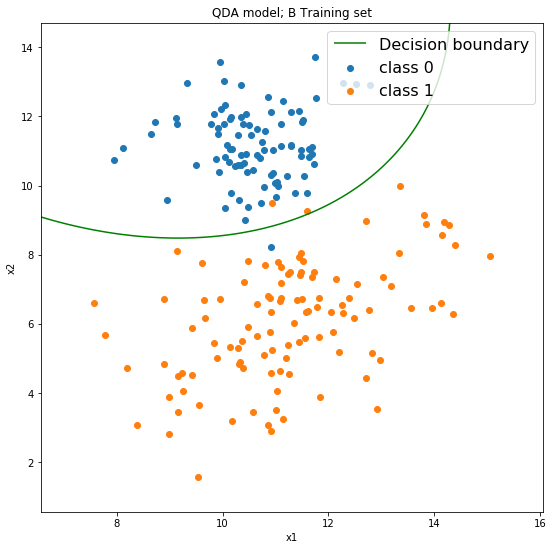

In [45]:
y_pred = np.array([QDA.predict(x, mu0, mu1, sigma0, sigma1, pi) for x in X])
print('Misclassification error rate: {} %'.format(utils.misclassification_rate(y_pred, y)))
QDA.plot_boundary(X, y, coefs, 'QDA model; {} Training set'.format(dataset_letter))

### Test set

Misclassification error rate: 2.5 %


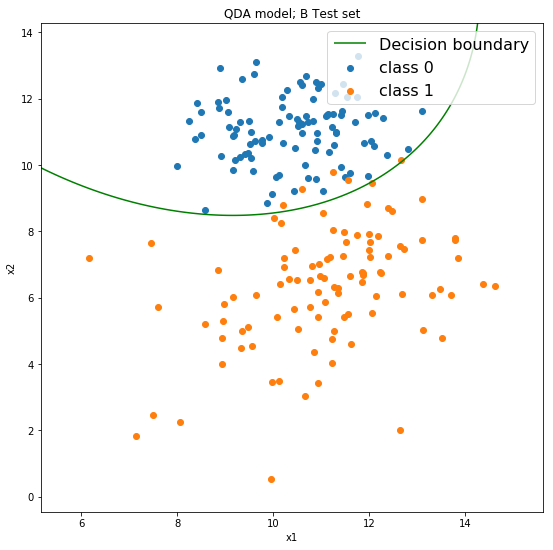

In [46]:
y_pred = np.array([QDA.predict(x, mu0, mu1, sigma0, sigma1, pi) for x in X_test])
print('Misclassification error rate: {} %'.format(utils.misclassification_rate(y_pred, y_test)))
QDA.plot_boundary(X_test, y_test, coefs, 'QDA model; {} Test set'.format(dataset_letter))

## Dataset C

In [47]:
X, y = X_train_C, y_train_C
X_test, y_test = X_test_C, y_test_C
n = X.shape[0]
dataset_letter = 'C'

### Training set

In [48]:
mu0, mu1, sigma0, sigma1, pi = QDA.mle(X, y)
a, b, c, d, e, f = QDA.linear_coef(mu0, mu1, sigma0, sigma1, pi)

coefs = {'mu0':mu0, 'mu1':mu1, 'sigma0':sigma0, 'sigma1':sigma1, 'pi':pi,
         'a':a, 'b':b, 'c':c, 'd':d, 'e':e, 'f':f}

for key in coefs.keys():
    print('{} : {}'.format(key, coefs[key]))

mu0 : [10.6192273  10.83868653]
mu1 : [11.18463199  6.04249315]
sigma0 : [[ 1.28576019 -0.43356756]
 [-0.43356756  1.82602425]]
sigma1 : [[1.26768817 0.45714317]
 [0.45714317 1.44158652]]
pi : 0.4166666666666667
a : -0.02262538204014608
b : 0.24159403714202915
c : -0.09397328451373094
d : -2.8983181588741243
e : -7.010294955641504
f : 54.62798695655249


Misclassification error rate: 2.67 %


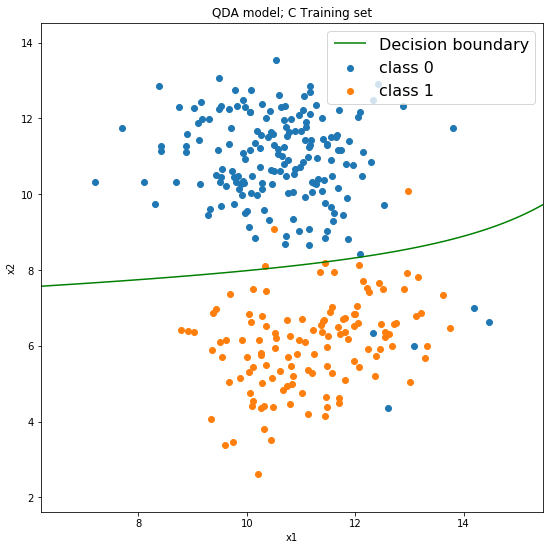

In [49]:
y_pred = np.array([QDA.predict(x, mu0, mu1, sigma0, sigma1, pi) for x in X])
print('Misclassification error rate: {} %'.format(utils.misclassification_rate(y_pred, y)))
QDA.plot_boundary(X, y, coefs, 'QDA model; {} Training set'.format(dataset_letter))

### Test set

Misclassification error rate: 4.33 %


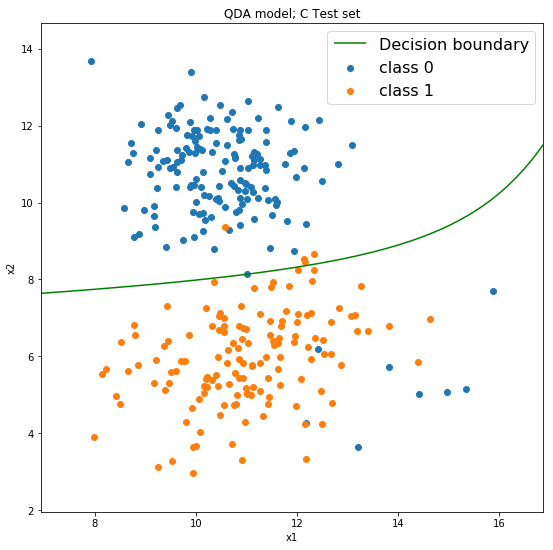

In [50]:
y_pred = np.array([QDA.predict(x, mu0, mu1, sigma0, sigma1, pi) for x in X_test])
print('Misclassification error rate: {} %'.format(utils.misclassification_rate(y_pred, y_test)))
QDA.plot_boundary(X_test, y_test, coefs, 'QDA model; {} Test set'.format(dataset_letter))